<font size="5">Importing python packages </font>

In [1]:
# General packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# NLP packages
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from nltk.stem import WordNetLemmatizer


# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import ensemble
from sklearn import metrics
from sklearn.metrics import accuracy_score

from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 14, 6
plt.style.use('ggplot')

<font size="5">Reading and performing basic analysis of the data</font>

In [2]:
data = pd.read_csv('slot_reviews_V2.csv')
data.head(5)

,Date,Stars,Sentiment_rating,Details,Text,Remark
0,2-14W,4-stars or above,Advertising,廣告太多,"If you still give us a lot of ads, let them be...",NaN
1,2-14W,4-stars or above,Positive,Positive,"Great casino so far, nice machines",NaN
2,2-14W,4-stars or above,Positive,個人意見,you are ksk,NaN
3,2-14W,4-stars or above,Positive,Positive,Fun games,NaN
4,2-14W,4-stars or above,Positive,Positive,Very good,NaN


In [3]:
df_reviews=pd.concat([data.Sentiment_rating,data.Text],axis=1)
df_reviews.dropna(axis=0,inplace=True)
df_reviews.head(5)

,Sentiment_rating,Text
0,Advertising,"If you still give us a lot of ads, let them be..."
1,Positive,"Great casino so far, nice machines"
2,Positive,you are ksk
3,Positive,Fun games
4,Positive,Very good


In [4]:
df_reviews.Sentiment_rating.value_counts()

Positive             576
Numerical            182
Technician Issues    120
General Questions     56
Advertising           56
Graphic               25
Name: Sentiment_rating, dtype: int64

<font size="5">Convert categorical labels to numerical form</font>

In [5]:
def numerical_convertion(df_reviews):
    df_reviews.replace(to_replace ="Positive", value =0, inplace=True)
    df_reviews.replace(to_replace ="Numerical", value =1, inplace=True)
    df_reviews.replace(to_replace ="Technician Issues", value =1, inplace=True)
    df_reviews.replace(to_replace ="Advertising", value =1, inplace=True)
    df_reviews.replace(to_replace ="Graphic", value =0, inplace=True)
    df_reviews.replace(to_replace ="General Questions", value =2, inplace=True)

In [6]:
numerical_convertion(df_reviews["Sentiment_rating"])
df_reviews.Sentiment_rating.value_counts()

0    601
1    358
2     56
Name: Sentiment_rating, dtype: int64

<AxesSubplot:xlabel='Sentiment_rating', ylabel='count'>

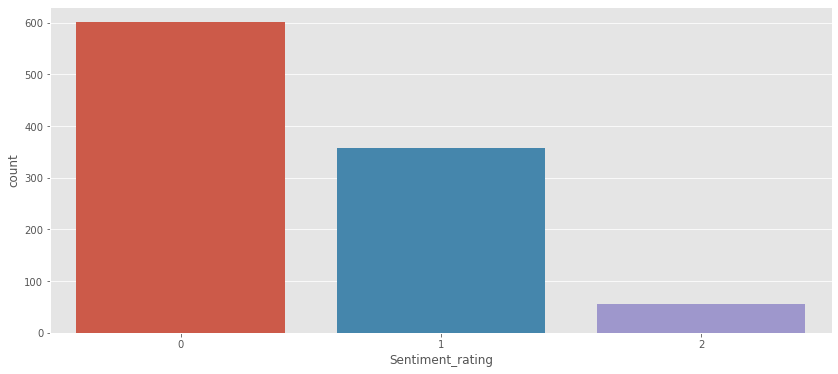

In [7]:
sns.countplot(df_reviews.Sentiment_rating)

<font size="5">Data Pre-processing</font>

<font size="5">Lemmatization</font>

In [8]:
lm = WordNetLemmatizer()
def text_transformation(df_col):
    text_list = []
    for text in df_col:
        text = re.sub('[^a-zA-Z]',' ',str(text))
        text = text.lower()
        text = nltk.word_tokenize(text)
        text = [lm.lemmatize(word) for word in text if word not in set(stopwords.words('english'))]
        text_list.append(' '.join(str(x) for x in text))
    return text_list

In [9]:
df_reviews['Text_new'] = text_transformation(df_reviews['Text'])

In [10]:
#review the changes
print(df_reviews['Text'][100])
print(df_reviews['Text_new'][100])

Love it fun game just like the real games you play at the casino
love fun game like real game play casino


In [11]:
token_lists = [word_tokenize(each) for each in df_reviews['Text_new']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens now: ",len(set(tokens)))

Number of unique tokens now:  1409


<font size="5">Bag-of-words</font>

In [12]:
# The following code creates a word-document matrix.
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(df_reviews['Text_new'])
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,able,abnormal,absolute,absolutely,acceleration,acceptable,access,accordingly,account,accrued,...,yep,yes,yet,yo,yoi,youll,youtube,yummy,zero,zeroing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


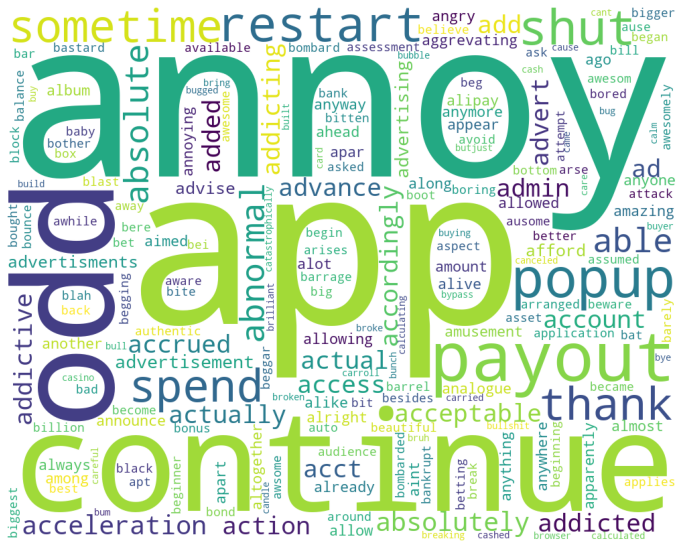

In [13]:
from wordcloud import WordCloud
plt.subplots(figsize=(12,12))
wordcloud=WordCloud(background_color="white",width=1000,height=800).generate(" ".join(df))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<font size="5">Creating CountVector</font>

In [14]:
bow_counts = CountVectorizer(tokenizer= word_tokenize, 
                            
                             ngram_range=(1,4)) 

bow_data = bow_counts.fit_transform(df_reviews['Text_new'])

In [15]:
bow_data


<1015x14242 sparse matrix of type '<class 'numpy.int64'>'
	with 19887 stored elements in Compressed Sparse Row format>

In [16]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data,
                                                                    df_reviews['Sentiment_rating'],
                                                                    test_size = 0.2,
                                                                    random_state = 50)

In [17]:
y_test_bow.value_counts()/y_test_bow.shape[0]

0    0.635468
1    0.305419
2    0.059113
Name: Sentiment_rating, dtype: float64

In [18]:
print(X_train_bow.shape)
print(X_test_bow.shape)

(812, 14242)
(203, 14242)


<font size="5">Applying logistic regression</font>

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
clf = LogisticRegression(max_iter = 200)
clf.fit(X_train_bow, y_train_bow)
y_pred = clf.predict(X_test_bow)
from sklearn.metrics import accuracy_score
#print("F1 score: ", f1_score(y_test_bow,y_pred, average='micro'))
accuracy_score(y_test_bow, y_pred)

0.8571428571428571

In [20]:
confusion_matrix(y_test_bow, y_pred)

array([[125,   4,   0],
       [ 15,  47,   0],
       [  4,   6,   2]])

In [21]:
print(classification_report(y_test_bow, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       129
           1       0.82      0.76      0.79        62
           2       1.00      0.17      0.29        12

    accuracy                           0.86       203
   macro avg       0.90      0.63      0.66       203
weighted avg       0.86      0.86      0.84       203



<font size="5">Applying Random Forest</font>

In [22]:
forest = ensemble.RandomForestClassifier(n_estimators = 100)
forest_fit = forest.fit(X_train_bow, y_train_bow)
y_pred = forest.predict(X_train_bow)
accuracy_score(y_train_bow, y_pred)




0.9987684729064039

In [23]:
confusion_matrix(y_train_bow, y_pred)

array([[472,   0,   0],
       [  1, 295,   0],
       [  0,   0,  44]])

<font size="5">Features Interpretation</font>

In [24]:
lr_weights = pd.DataFrame(list(zip(bow_counts.get_feature_names(), 
                                   clf.coef_[0])), 
                          columns= ['words','weights'])

# top-15 more important features for positive reviews
lr_weights.sort_values(['weights'], ascending = False)[:15] 

,words,weights
4354,fun,1.026933
7817,love,0.899812
6142,great,0.899336
5798,good,0.876630
8937,ok,0.858215
8759,nice,0.730324
1031,awesome,0.652849
1287,best,0.652827
6057,graphic,0.579924
2614,cool,0.543076


In [25]:
# top-15 more important features for negative reviews
lr_weights.sort_values(['weights'], ascending = False)[-15:] 


,words,weights
2233,coin,-0.683608
13791,winning,-0.688320
107,ad,-0.689730
4279,freezing,-0.692106
2126,cheating,-0.719119
2140,chip,-0.736190
11875,start,-0.745978
13579,win,-0.773872
9068,open,-0.786392
9229,pay,-0.786828


<font size="5">TF-IDF model</font>

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Creating CountVectorizer
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize, 
                               ngram_range=(1,1)) 

tfidf_data = tfidf_counts.fit_transform(df_reviews['Text_new'])

In [27]:
tfidf_data

<1015x1409 sparse matrix of type '<class 'numpy.float64'>'
	with 5929 stored elements in Compressed Sparse Row format>

In [28]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,
                                                                            df_reviews['Sentiment_rating'],
                                                                            test_size = 0.2,
                                                                            random_state = 50)

In [29]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(812, 1409)
(203, 1409)


<font size="5">Applying logistic regression to TF-IDF features</font>

In [30]:
clf_tf_idf = LogisticRegression()
clf_tf_idf.fit(X_train_tfidf,y_train_tfidf)
y_pred = clf_tf_idf.predict(X_test_tfidf)
print("F1 score: ", f1_score(y_test_tfidf,y_pred, average='micro'))

F1 score:  0.8620689655172413


In [31]:
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
confusion_matrix(y_test_tfidf, y_pred)

array([[121,   8,   0],
       [ 10,  52,   0],
       [  2,   8,   2]])

In [33]:
print(classification_report(y_test_tfidf, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       129
           1       0.76      0.84      0.80        62
           2       1.00      0.17      0.29        12

    accuracy                           0.86       203
   macro avg       0.89      0.65      0.67       203
weighted avg       0.87      0.86      0.85       203

